In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [3]:
# pip install pandas_datareader

In [4]:
# pip install tensorflow

In [5]:
# pip install yfinance

In [6]:
start="2012-01-01"
end="2022-01-21"

stock="GOOG"

In [11]:
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-01-13,141.840500,143.185501,138.914001,139.130997,139.130997,26566000
2022-01-14,137.500000,141.200500,137.500000,139.786499,139.786499,23826000
2022-01-18,136.600006,137.391495,135.617004,136.290497,136.290497,27382000


In [14]:
data.reset_index(inplace=True)

# we reset index value from default i.e date 

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2525,2022-01-13,141.840500,143.185501,138.914001,139.130997,139.130997,26566000
2526,2022-01-14,137.500000,141.200500,137.500000,139.786499,139.786499,23826000
2527,2022-01-18,136.600006,137.391495,135.617004,136.290497,136.290497,27382000
2528,2022-01-19,136.938507,138.399506,135.500000,135.651993,135.651993,20796000


In [16]:
ma_100_days=data.Close.rolling(100).mean()

# on interval of 100 days of closing we find mean

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


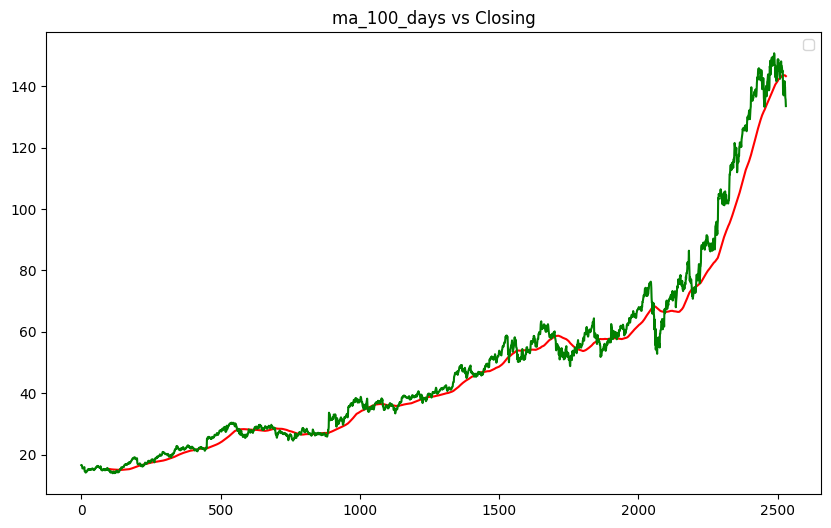

In [17]:
plt.figure(figsize=(10,6))
plt.title("ma_100_days vs Closing")
plt.plot(ma_100_days,"red")
plt.plot(data["Close"],"g")
plt.legend()
plt.show()


In [18]:
ma_200_days=data.Close.rolling(200).mean()

# on interval of 200 days of closing we find mean

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


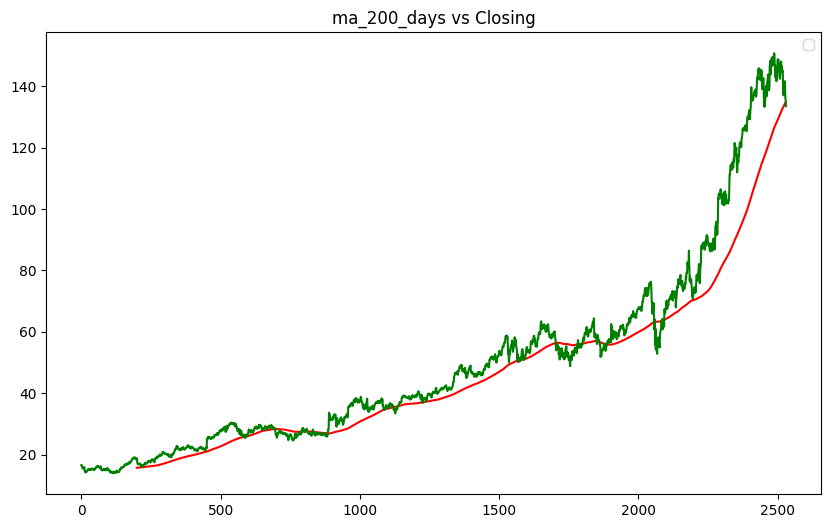

In [19]:
plt.figure(figsize=(10,6))
plt.title("ma_200_days vs Closing")
plt.plot(ma_200_days,"red")
plt.plot(data["Close"],"g")
plt.legend()
plt.show()

In [20]:
data.dropna(inplace=True)
# droping na value 

In [21]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2525,2022-01-13,141.840500,143.185501,138.914001,139.130997,139.130997,26566000
2526,2022-01-14,137.500000,141.200500,137.500000,139.786499,139.786499,23826000
2527,2022-01-18,136.600006,137.391495,135.617004,136.290497,136.290497,27382000
2528,2022-01-19,136.938507,138.399506,135.500000,135.651993,135.651993,20796000


In [22]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [24]:
data_train.shape[0]

2024

In [25]:
data_test.shape[0]

506

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

# MinMaxScaler try to all values in between 0 to 1 scale 

In [27]:
data_train_scale=scaler.fit_transform(data_train)

In [28]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [29]:
x,y=np.array(x),np.array(y)

In [30]:
# model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [31]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu",return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model

<Sequential name=sequential, built=True>

In [34]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [35]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - loss: 0.1152
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0715
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 0.0653
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - loss: 0.0667
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 0.0623
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - loss: 0.0612
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 0.0650
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.0628
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - loss: 0.0615
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - loss: 0.0623
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - loss: 0.0625
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 0.0610
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0598
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0624
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [37]:
p_100_day=data_train.tail(100)

In [38]:
data_test=pd.concat([p_100_day,data_test],ignore_index=True)

In [39]:
data_test

,Close
0,58.391998
1,58.550999
2,59.642502
3,59.404999
4,58.419498
...,...
601,139.130997
602,139.786499
603,136.290497
604,135.651993


In [81]:
data_test_scale=scaler.fit_transform(data_test)

In [82]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [83]:
x,y=np.array(x),np.array(y)

In [84]:
y_predict=model.predict(x)

# predicting model 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [94]:
y_predict[1]

array([[0.38403076],
       [0.39279974],
       [0.3921906 ],
       [0.39017448],
       [0.38851485],
       [0.38737863],
       [0.3866492 ],
       [0.38619542],
       [0.38591892],
       [0.38575333],
       [0.38565594],
       [0.3855997 ],
       [0.3855678 ],
       [0.38554987],
       [0.3855397 ],
       [0.3855339 ],
       [0.38553035],
       [0.385528  ],
       [0.38552618],
       [0.38552472],
       [0.3855235 ],
       [0.38552234],
       [0.3855212 ],
       [0.38552007],
       [0.38551885],
       [0.3855176 ],
       [0.38551638],
       [0.38551524],
       [0.3855142 ],
       [0.38551325],
       [0.38551247],
       [0.38551185],
       [0.38551137],
       [0.3855111 ],
       [0.38551107],
       [0.3855113 ],
       [0.3855118 ],
       [0.38551235],
       [0.38551295],
       [0.38551366],
       [0.3855145 ],
       [0.38551545],
       [0.3855167 ],
       [0.38551795],
       [0.38551915],
       [0.38552013],
       [0.385521  ],
       [0.385

In [95]:
scale=1/scaler.scale_

In [96]:
y_prdeict=y_predict*scale

In [97]:
y=y*scale

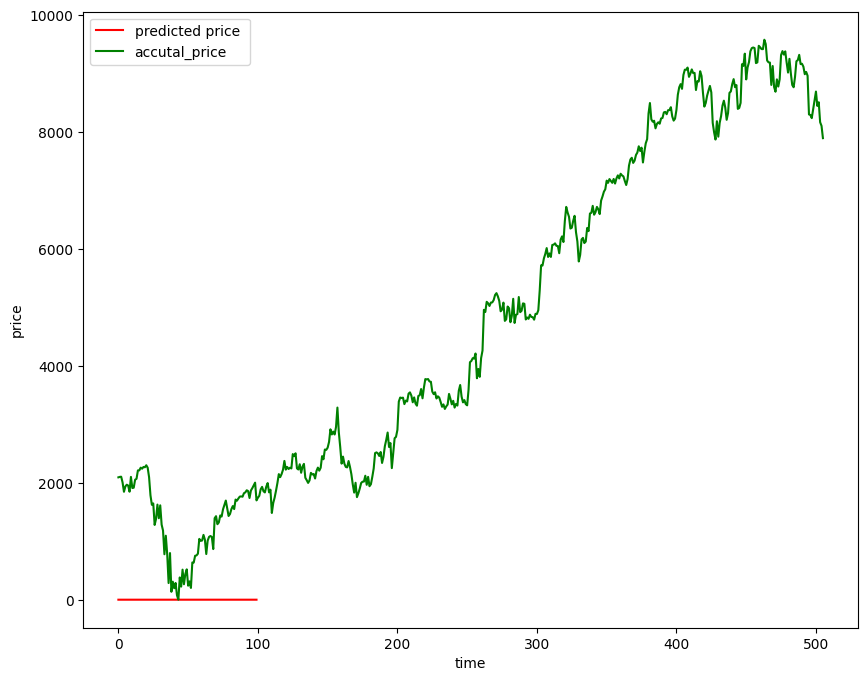

In [101]:
plt.figure(figsize=(10,8))
plt.plot(y_predict[0], "r" ,label="predicted price ")
plt.plot(y, "g",label="accutal_price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()



In [102]:
model.save("stock predict model.keras")